<a href="https://colab.research.google.com/github/savaris/Python_Applications/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Creating a regression model of the house prices in Boston based on multiple variables.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [8]:
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=feature_names)
df['MEDV'] = target

print("Data Shape:",data.shape)
print("Data Target:", target.shape)
print(data[:5])
print(target[:5])

Data Shape: (506, 13)
Data Target: (506,)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


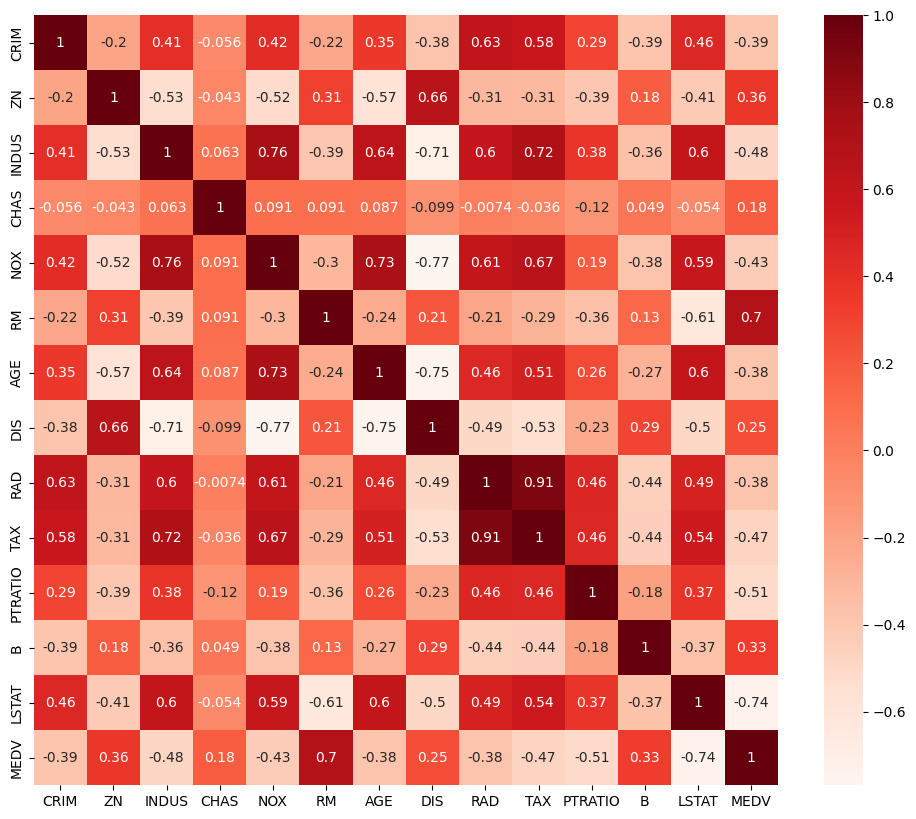

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
# Heatmap to show correlation between within the Boston data set.